## Check GPU

In [1]:
!nvidia-smi

Tue Sep 26 05:39:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Python 3 environment 
* Comes with many helpful analytics libraries installed

* It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

* For example, here's several helpful packages to load

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Downloading The Helper Function

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-09-26 05:39:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-26 05:39:40 (38.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load the FOOD 101 Dataset from  `tensorflow_datasets`

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Print out the list of dataset in TFDS
data_list = tfds.list_builders()
# print(data_list)
print("food101" in data_list)

True


In [6]:
# Load the FOOD101 dataset
(train_data, test_data), ds_info = tfds.load(name = "food101",
                                             split = ["train", "validation"],
                                             shuffle_files = True,
                                             as_supervised = True,
                                             with_info = True
                                             )

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompletePF59PT/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompletePF59PT/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Getting one with the data

> Features of the dataset

> Class Name Of The Data

> The Shape of our input data

> Data Type of the input data

> What does the label look like?

> Do the labels Match of the class names

In [7]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [8]:
class_name = ds_info.features['label'].names
class_name

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [9]:
train_one_sample = train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
for image, label in train_one_sample:
  print(f"""

  Image Shape: {image.shape}
  Image Datatype: {image.dtype}
  Target class from food101 (tensor form): {label}
  Class name (str form): {class_name[label.numpy()]}

""")



  Image Shape: (512, 512, 3)
  Image Datatype: <dtype: 'uint8'>
  Target class from food101 (tensor form): 41
  Class name (str form): french_onion_soup




In [11]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[168, 148, 123],
        [192, 172, 147],
        [200, 180, 155],
        ...,
        [179, 165, 139],
        [188, 172, 147],
        [154, 138, 113]],

       [[184, 164, 139],
        [209, 189, 164],
        [212, 192, 167],
        ...,
        [207, 193, 167],
        [218, 202, 177],
        [184, 168, 143]],

       [[186, 166, 139],
        [214, 194, 167],
        [211, 194, 168],
        ...,
        [207, 193, 167],
        [217, 203, 177],
        [180, 166, 140]],

       ...,

       [[206, 198, 179],
        [236, 228, 209],
        [230, 221, 204],
        ...,
        [226, 214, 200],
        [239, 227, 211],
        [203, 191, 175]],

       [[216, 208, 187],
        [239, 231, 210],
        [233, 225, 206],
        ...,
        [227, 215, 201],
        [237, 225, 209],
        [205, 193, 177]],

       [[173, 165, 144],
        [198, 190, 169],
        [204, 196, 177],
        ...,
        [197, 185, 17

In [12]:
import tensorflow as tf
print(tf.reduce_min(image))
print(tf.reduce_max(image))

tf.Tensor(0, shape=(), dtype=uint8)
tf.Tensor(255, shape=(), dtype=uint8)


## Plot one image from the dataset

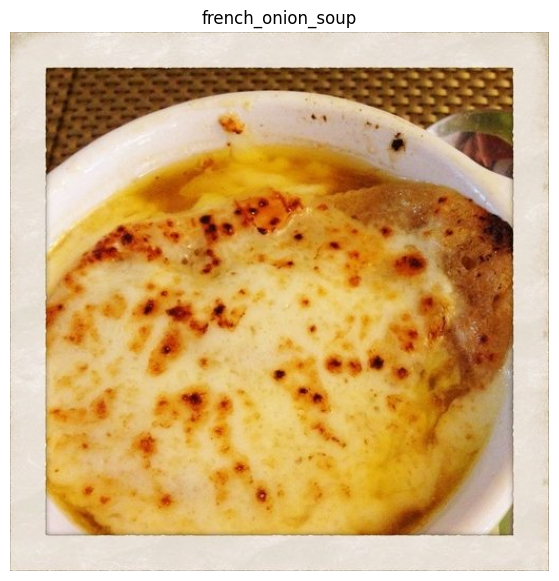

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
plt.imshow(image)
plt.title(class_name[label.numpy()])
plt.axis(False)
plt.show()

## Create a preprocessing Function

In [14]:
import tensorflow as tf

def img_preprocess(image, label, img_shape=224):
    # Reshape the image
    image = tf.image.resize(image, [img_shape, img_shape])
    # Rescale the image if using a model like RESNET
    # image = image / 255.0
    # Convert the image from uint8 to float32
    image = tf.cast(image, tf.float32)

    return image, label

In [15]:
preprocessed_img = img_preprocess(image, label)[0]
print(f"Image before preprocessing of the image: \n {image[:2]} \nImage Shape: \n{image[:2].shape} \n Image Data type: {image[:2].dtype}")
print(f"Image after Preprocessing of the image: \n {preprocessed_img[:2]} \n Preprocessed Image Shape: \n {preprocessed_img[:2].shape} \nPreprocessed Datatype: \n{preprocessed_img[:2].dtype}")

Image before preprocessing of the image: 
 [[[168 148 123]
  [192 172 147]
  [200 180 155]
  ...
  [179 165 139]
  [188 172 147]
  [154 138 113]]

 [[184 164 139]
  [209 189 164]
  [212 192 167]
  ...
  [207 193 167]
  [218 202 177]
  [184 168 143]]] 
Image Shape: 
(2, 512, 3) 
 Image Data type: <dtype: 'uint8'>
Image after Preprocessing of the image: 
 [[[194.12755 174.12755 149.12755]
  [204.66325 184.66325 159.66325]
  [198.20918 180.42348 158.85204]
  ...
  [200.12253 186.55106 160.97958]
  [204.22949 190.22949 164.22949]
  [195.14168 179.14168 154.14168]]

 [[197.10204 177.10204 150.10204]
  [202.5102  185.5102  159.5102 ]
  [209.96428 193.83673 169.47958]
  ...
  [201.301   187.72952 162.15805]
  [207.8622  193.8622  167.8622 ]
  [197.218   183.218   157.218  ]]] 
 Preprocessed Image Shape: 
 (2, 224, 3) 
Preprocessed Datatype: 
<dtype: 'float32'>


## Batch and prepare the dataset

In [16]:
# For train_data
train_data = train_data.map(img_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

# For test_data
test_data = test_data.map(img_preprocess, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create modelling callbacks

> Create tensorboard callback from helper function analyse the model

> Create model check point call back to save our model's progress during training

In [18]:
# Create tensorboard callback (import from helper function)
from helper_functions import create_tensorboard_callback

# Create model checkpoint callback
checkpoint_path = "model_checkpoints/cp.ckpt"
check_point = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 monitor = "val_acc",
                                                 save_best_only=True,
                                                 save_weights_only = True,
                                                 verbose = 0)

## Set-up mixed precision training
* Mixed precision utilizes a combination of float32 and float16 data types to speed up model performance.

In [19]:
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy("mixed_float16")
mixed_precision.set_global_policy(policy)

In [20]:
print('Compute dtype: %s' % policy.compute_dtype)
print('Variable dtype: %s' % policy.variable_dtype)

Compute dtype: float16
Variable dtype: float32


## Building the feature extractor model

In [21]:
import tensorflow as tf
img_shape = (224, 224, 3)
# Building a base model using EfficientNetB0 model
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Build a functional API model
inputs = tf.keras.layers.Input(shape = img_shape, name = "input_layer")
x = base_model(inputs, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(len(class_name))(x)
outputs = tf.keras.layers.Activation("softmax", dtype = tf.float32, name = "softmax_float32")(x)
model_0 = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 2s 0us/step


In [22]:
# Model Summary
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [23]:
# Compile the model
model_0.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [24]:
# Fit the feature extraction model with callbacks
history_101_food_classes_feature_extract = model_0.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=(len(train_data)),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                                                            experiment_name="efficientnetb0_101_classes_all_data_feature_extract"),
                                                                check_point])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20230926-055554
Epoch 1/3
2368/2368 [==============================] - 195s 76ms/step - loss: 1.7182 - accuracy: 0.5813 - val_loss: 1.1319 - val_accuracy: 0.7042
Epoch 2/3
2368/2368 [==============================] - 179s 74ms/step - loss: 1.2001 - accuracy: 0.6889 - val_loss: 1.0298 - val_accuracy: 0.7182
Epoch 3/3
2368/2368 [==============================] - 171s 71ms/step - loss: 1.0540 - accuracy: 0.7240 - val_loss: 0.9953 - val_accuracy: 0.7235


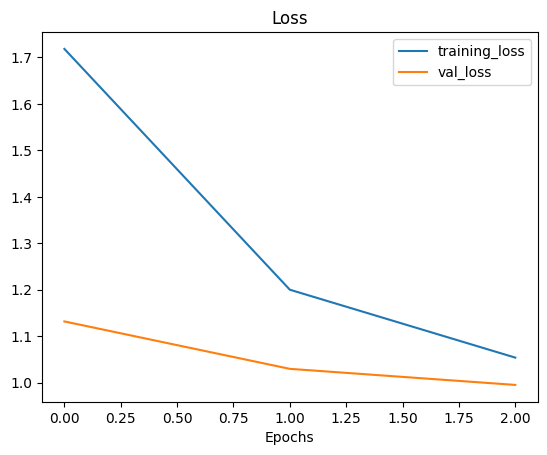

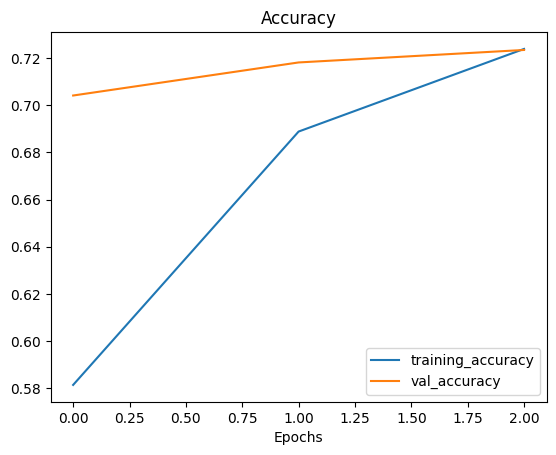

In [25]:
plot_loss_curves(history_101_food_classes_feature_extract)

In [26]:
# Evaluate model on whole test dataset
results_model_0 = model_0.evaluate(test_data)
results_model_0

790/790 [==============================] - 55s 69ms/step - loss: 1.0007 - accuracy: 0.7256


[1.0006946325302124, 0.7256237864494324]

## Running a series of transfer learning experiments
Now, we will carry out multiple model building experiments to find the best model for our project.
* **Model 01:** Use Feature Extractor Transefer Learning with data augmentation
* **Model 02:** Fine-tune the Model 1 checkpoint with Last 10 layers trainable of the base model with data augmentation
* **Model 03:** Fine-tune the Model 0 checkpoint with Last 10 layers trainable of the base model without data augmentation
* **Model 04:** Fine-tune the Model 1 checkpoint with Last 20 layers trainable of the base model with data augmentation

### Data Augmentation
To use data augmentation right within our model we'll create a Keras Sequential model consisting of only data preprocessing layers, we can then use this Sequential model within another Functional model.

In [27]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
], name ="data_augmentation")

## **Model 01:** Use Feature Extractor Transefer Learning with data augmentation

In [28]:
# Build a functional API model
inputs = tf.keras.layers.Input(shape = img_shape, name = "input_layer")
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(len(class_name))(x)
outputs = tf.keras.layers.Activation("softmax", dtype = tf.float32, name = "softmax_float32")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [29]:
# Compile the model
model_1.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [30]:
# Fit the model
history_2 = model_1.fit(train_data,
                    epochs=3,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25*len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback(dir_name="training_logs",
                                                            experiment_name = "efficientnetb0_101_model_1"),
                                                                check_point])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_model_1/20230926-060612
Epoch 1/3
2368/2368 [==============================] - 441s 181ms/step - loss: 2.0755 - accuracy: 0.4978 - val_loss: 1.2936 - val_accuracy: 0.6501
Epoch 2/3
2368/2368 [==============================] - 252s 106ms/step - loss: 1.5986 - accuracy: 0.5931 - val_loss: 1.2026 - val_accuracy: 0.6718
Epoch 3/3
2368/2368 [==============================] - 222s 93ms/step - loss: 1.4772 - accuracy: 0.6206 - val_loss: 1.1565 - val_accuracy: 0.6826


In [31]:
results_model_1 = model_1.evaluate(test_data)
results_model_1

790/790 [==============================] - 52s 65ms/step - loss: 1.1514 - accuracy: 0.6856


[1.1513991355895996, 0.6855841875076294]

##

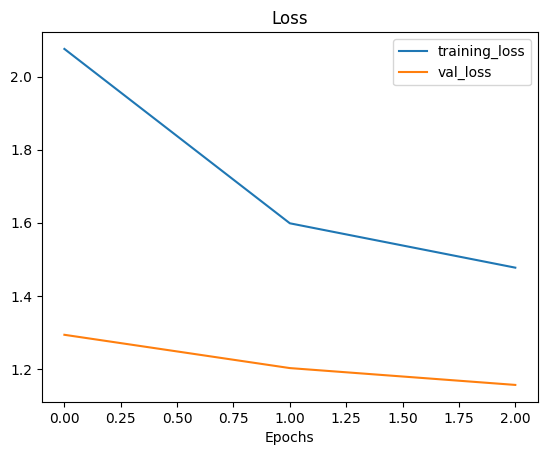

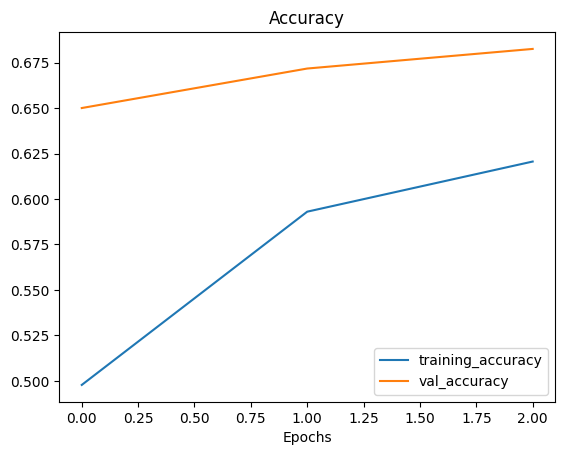

In [32]:
plot_loss_curves(history_2)

## **Model 02:** Fine-tune the Model 1 checkpoint with Last 5 layers trainable of the base model with data augmentation

In [33]:
model_1.layers

In [34]:
for layer_number, layer in enumerate(model_1.layers):
    print(f"Layer Number: {layer_number} | Layer Name: {layer.name} | Trainable?: {layer.trainable}")

Layer Number: 0 | Layer Name: input_layer | Trainable?: True
Layer Number: 1 | Layer Name: data_augmentation | Trainable?: True
Layer Number: 2 | Layer Name: efficientnetb0 | Trainable?: False
Layer Number: 3 | Layer Name: global_average_pooling2d_1 | Trainable?: True
Layer Number: 4 | Layer Name: dense_1 | Trainable?: True
Layer Number: 5 | Layer Name: softmax_float32 | Trainable?: True


In [35]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0   

In [36]:
model_1_base_model = model_1.layers[2]
model_1_base_model.name

'efficientnetb0'

In [37]:
# How many layers are trainable in the base model
print(len(model_1_base_model.trainable_variables))

0


In [38]:
for layer_number, layer in enumerate(model_1_base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [39]:
# Make all the layers of the base model trainable
model_1_base_model.trainable = True

for layer in model_1_base_model.layers[:-10]:
      layer.trainable = False
  
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
               metrics = ["accuracy"])

In [40]:
# How many layers are trainable in the base model
print(len(model_1.trainable_variables))

12


In [41]:
for layer_number, layer in enumerate(model_1_base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [42]:
history_3 = model_1.fit(train_data, epochs = 8, validation_data = test_data,
                        initial_epoch = history_2.epoch[-1],
                        validation_steps = int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning", "fine_tune_model_1")])

Saving TensorBoard log files to: transfer_learning/fine_tune_model_1/20230926-062331
Epoch 3/8
2368/2368 [==============================] - 230s 90ms/step - loss: 1.2925 - accuracy: 0.6602 - val_loss: 1.0492 - val_accuracy: 0.7118
Epoch 4/8
2368/2368 [==============================] - 210s 88ms/step - loss: 1.1726 - accuracy: 0.6911 - val_loss: 1.0157 - val_accuracy: 0.7188
Epoch 5/8
2368/2368 [==============================] - 195s 82ms/step - loss: 1.0947 - accuracy: 0.7072 - val_loss: 0.9861 - val_accuracy: 0.7284
Epoch 6/8
2368/2368 [==============================] - 207s 86ms/step - loss: 1.0278 - accuracy: 0.7236 - val_loss: 0.9770 - val_accuracy: 0.7299
Epoch 7/8
2368/2368 [==============================] - 203s 85ms/step - loss: 0.9753 - accuracy: 0.7348 - val_loss: 0.9703 - val_accuracy: 0.7276
Epoch 8/8
2368/2368 [==============================] - 196s 81ms/step - loss: 0.9289 - accuracy: 0.7477 - val_loss: 0.9563 - val_accuracy: 0.7322


In [43]:
result_model_2 = model_1.evaluate(test_data)
result_model_2

790/790 [==============================] - 52s 65ms/step - loss: 0.9525 - accuracy: 0.7365


[0.9525204300880432, 0.7365148663520813]

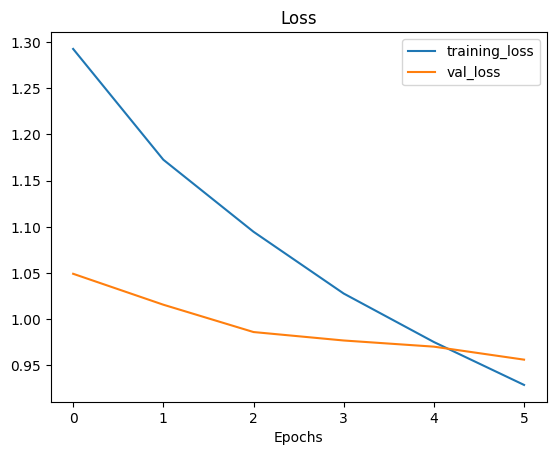

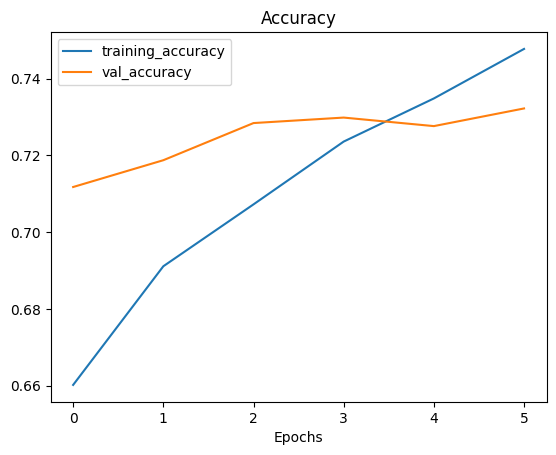

In [44]:
plot_loss_curves(history_3)

## **Model 03:** Fine-tune the Model 0 checkpoint with Last 10 layers trainable of the base model without data augmentation

In [45]:
model_0.layers

In [46]:
for layer_number, layer in enumerate(model_0.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 efficientnetb0 True
2 global_average_pooling2d True
3 dense True
4 softmax_float32 True


In [47]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 1,022,613
Non-train

In [48]:
model_0_base_model = model_0.layers[1]
model_0_base_model.name

'efficientnetb0'

In [49]:
model_0_base_model.trainable = True
for layer in model_0_base_model.layers[:-10]:
    layer.trainable = False
# Re-Compile the model
model_0.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
               metrics = ["accuracy"])

In [50]:
for layer_number, layer in enumerate(model_0_base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [51]:
print(len(model_0.trainable_variables))

12


In [52]:
history_4 = model_0.fit(train_data, epochs = 6,
                       validation_data = test_data,
                       initial_epoch = history_101_food_classes_feature_extract.epoch[-1],
                       validation_steps = int(0.25 * len(test_data)),
                       callbacks=[create_tensorboard_callback("transfer_learning", "fine_tune_model_4")]) # name experiment appropriately

Saving TensorBoard log files to: transfer_learning/fine_tune_model_4/20230926-064534
Epoch 3/6
2368/2368 [==============================] - 197s 78ms/step - loss: 0.7037 - accuracy: 0.8074 - val_loss: 0.8527 - val_accuracy: 0.7643
Epoch 4/6
2368/2368 [==============================] - 196s 81ms/step - loss: 0.5845 - accuracy: 0.8406 - val_loss: 0.8466 - val_accuracy: 0.7698
Epoch 5/6
2368/2368 [==============================] - 188s 78ms/step - loss: 0.4937 - accuracy: 0.8685 - val_loss: 0.8672 - val_accuracy: 0.7663
Epoch 6/6
2368/2368 [==============================] - 185s 77ms/step - loss: 0.4181 - accuracy: 0.8905 - val_loss: 0.8859 - val_accuracy: 0.7644


In [53]:
result_model_4 = model_0.evaluate(test_data)

790/790 [==============================] - 52s 66ms/step - loss: 0.8871 - accuracy: 0.7637


In [54]:
result_model_4

[0.8870812058448792, 0.7636831402778625]

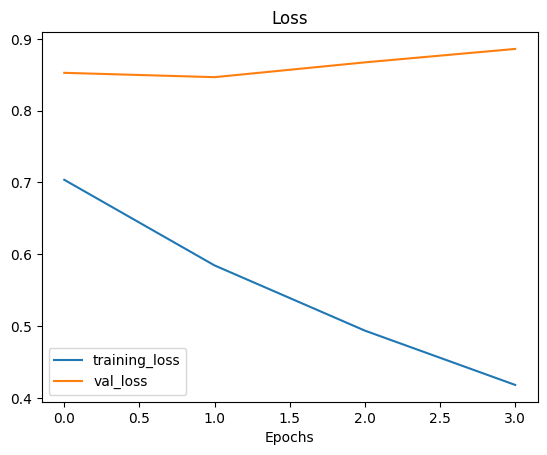

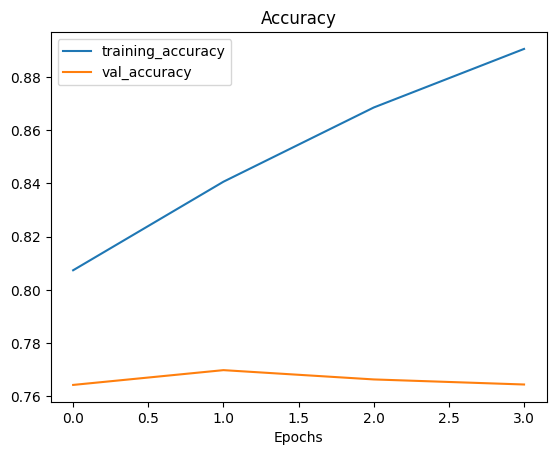

In [55]:
plot_loss_curves(history_4)

Even though this model beats `model_2` with 3% more accuracy but From the graph we can see that the `val_loss` line in `loss` graph is going up wards, which shows that the model is over fitting, Hence we cannot use the results of `model_4`. Instead, if you see the `loss` and `accuracy` graph for `model_2`, there is no sign of any overfitting because we used data_augmentation there.

## **Model 04:** Fine-tune the Model 1 checkpoint with Last 20 layers trainable of the base model with data augmentation

In [56]:
for layer_number, layer in enumerate(model_1_base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [57]:
model_0_base_model.trainable = True
for layer in model_0_base_model.layers[:-20]:
    layer.trainable = False
# Re-Compile the model
model_0.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
               metrics = ["accuracy"])

In [58]:
for layer_number, layer in enumerate(model_1_base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [59]:
history_5 = model_1.fit(train_data, epochs = 11, validation_data = test_data,
                        initial_epoch = history_3.epoch[-1],
                        validation_steps = int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning", "fine_tune_model_3")])

Saving TensorBoard log files to: transfer_learning/fine_tune_model_3/20230926-065944
Epoch 8/11
2368/2368 [==============================] - 201s 84ms/step - loss: 0.8689 - accuracy: 0.7564 - val_loss: 0.9716 - val_accuracy: 0.7324
Epoch 9/11
2368/2368 [==============================] - 195s 81ms/step - loss: 0.8059 - accuracy: 0.7739 - val_loss: 0.9668 - val_accuracy: 0.7332
Epoch 10/11
2368/2368 [==============================] - 192s 80ms/step - loss: 0.7671 - accuracy: 0.7826 - val_loss: 0.9507 - val_accuracy: 0.7383
Epoch 11/11
2368/2368 [==============================] - 201s 84ms/step - loss: 0.7375 - accuracy: 0.7911 - val_loss: 0.9684 - val_accuracy: 0.7337


In [60]:
result_model_5 = model_1.evaluate(test_data)
result_model_5

790/790 [==============================] - 53s 67ms/step - loss: 0.9572 - accuracy: 0.7392


[0.9572365283966064, 0.7391683459281921]

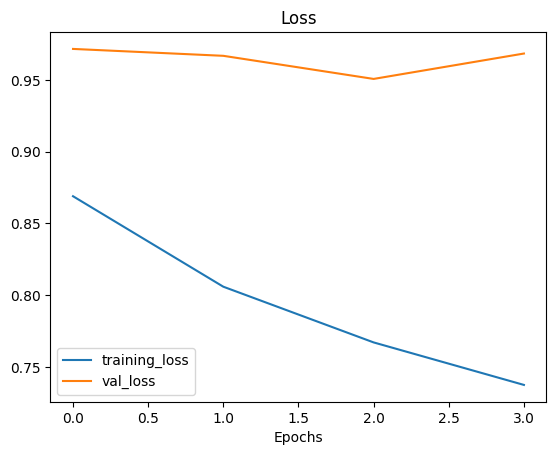

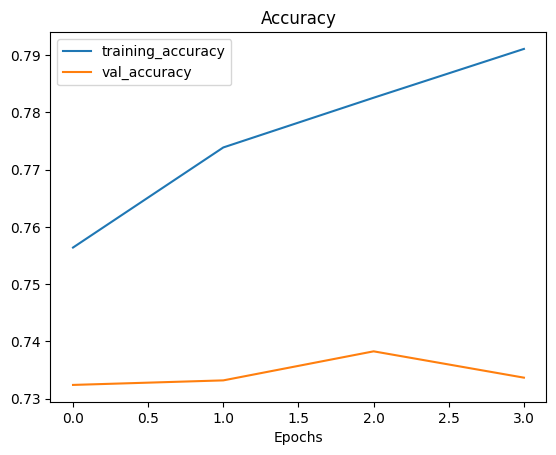

In [61]:
plot_loss_curves(history_5)

## **Model 05:** Fine-tune the Model 1 checkpoint with Last 20 layers trainable of the base model with data augmentation and using less additional epochs.

In [ ]:
model_0_base_model.trainable = True
for layer in model_0_base_model.layers[:-20]:
    layer.trainable = False
# Re-Compile the model
model_0.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
               metrics = ["accuracy"])

In [ ]:
history_5 = model_1.fit(train_data, epochs = 9, validation_data = test_data,
                        initial_epoch = history_3.epoch[-1],
                        validation_steps = int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning", "fine_tune_model_3")])